# Multiple Linear Regression on Advertising Dataset

### About the Dataset:

Source - [Kaggle](https://www.kaggle.com/ishaanv/ISLR-Auto#Advertising.csv)

The dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio and newspaper.
The sales are in thousands of units and the budget is in thousands of dollars.

### Loading Libraries and Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('Advertising.csv')

In [2]:
print(data.sample(10), '\n', '*'*50)
print(data.columns,  '\n','*'*50)
print(data.shape,  '\n','*'*50)
print(data.info(), '\n', '*'*50)
print(data.describe(), '\n', '*'*50)

     Unnamed: 0     TV  radio  newspaper  sales
103         104  187.9   17.2       17.9   14.7
16           17   67.8   36.6      114.0   12.5
39           40  228.0   37.7       32.0   21.5
190         191   39.5   41.1        5.8   10.8
93           94  250.9   36.5       72.3   22.2
61           62  261.3   42.7       54.7   24.2
135         136   48.3   47.0        8.5   11.6
146         147  240.1    7.3        8.7   13.2
140         141   73.4   17.0       12.9   10.9
143         144  104.6    5.7       34.4   10.4 
 **************************************************
Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object') 
 **************************************************
(200, 5) 
 **************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1

### Remove the index column

In [3]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.sample(10)

,TV,radio,newspaper,sales
112,175.7,15.4,2.4,14.1
191,75.5,10.8,6.0,9.9
101,296.4,36.3,100.9,23.8
23,228.3,16.9,26.2,15.5
113,209.6,20.6,10.7,15.9
48,227.2,15.8,49.9,14.8
163,163.5,36.8,7.4,18.0
17,281.4,39.6,55.8,24.4
169,284.3,10.6,6.4,15.0
149,44.7,25.8,20.6,10.1


### Exploratory Data Analysis

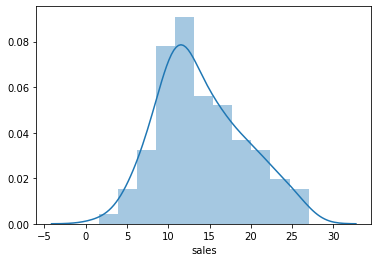

In [4]:
sns.distplot(data.sales);

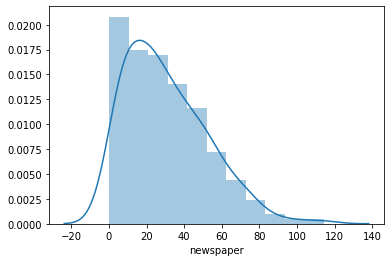

In [5]:
sns.distplot(data.newspaper);

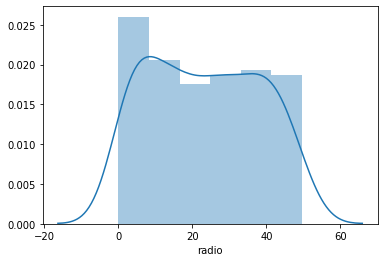

In [6]:
sns.distplot(data.radio);

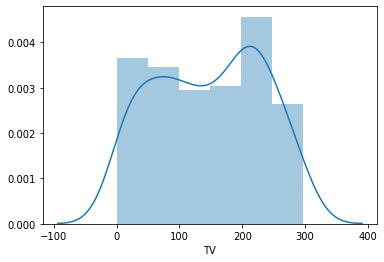

In [7]:
sns.distplot(data.TV);

### Exploring Relationships between Predictors and Response

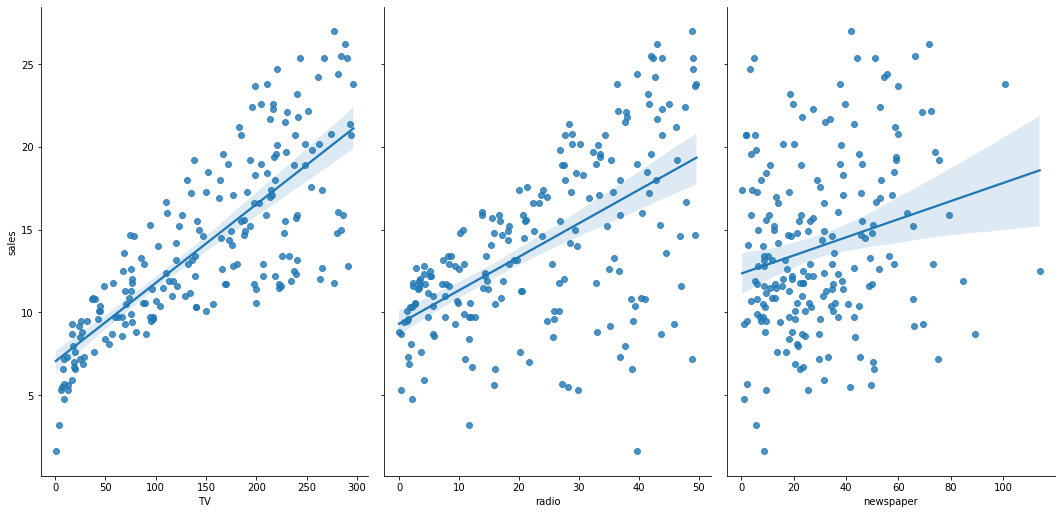

In [8]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg');

In [9]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


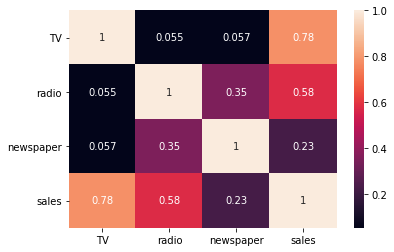

In [10]:
sns.heatmap(data.corr(), annot=True );

## Linear Regression Model

General linear regression model:
$y=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+...+\beta_{n}x_{n}$

- $y$  is the response
- $\beta_{0}$ is the intercept
- $\beta_{1}$ is the coefficient for  x1  (the first feature)
- $\beta_{n}$ is the coefficient for  xn  (the nth feature)
- $\beta_1$ is the feature coefficient and $y$ is the y-intercept

In our case: $y=\beta_{0}+\beta_{1}×TV+\beta_{2}×Radio+\beta_{3}×Newspaper$

The $\beta$ values are called the **model coefficients*:

- These values are "learned" during the model fitting step using the "least squares" criterion
- The fitted model is then used to make predictions

In [11]:
X = data.drop('sales', axis = 1)
X.sample(10)

,TV,radio,newspaper
127,80.2,0.0,9.2
169,284.3,10.6,6.4
107,90.4,0.3,23.2
193,166.8,42.0,3.6
156,93.9,43.5,50.5
121,18.8,21.7,50.4
82,75.3,20.3,32.5
51,100.4,9.6,3.6
101,296.4,36.3,100.9
42,293.6,27.7,1.8


In [12]:
y = data.sales
y.sample(10)

47     23.2
123    15.2
58     23.8
31     11.9
20     18.0
191     9.9
51     10.7
145    10.3
186    10.3
167    12.2
Name: sales, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=135)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [15]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Interpreting Model Coefficients

In [16]:
print(linreg.intercept_)
print(linreg.coef_)

2.9042201949052124
[ 0.04608557  0.19575288 -0.00713882]


### Making Predictions

In [17]:
asdf = linreg.predict(X_test)

### Model Score

In [18]:
print("Training set score: {:.2f}".format(linreg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(linreg.score(X_test, y_test)))

Training set score: 0.91
Test set score: 0.86
